In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

idsToMs.pkl
idsToSong.pkl
members.csv
msIds.npy
msIds.txt
msToIds.pkl
song_extra_info.csv
songs.csv
songsIds.npy
songsIds.txt
songsToIds.pkl
test.csv
train.csv
train_processed.csv



In [18]:
songs = pd.read_csv('input/songs.csv')

In [7]:
songs.head(3)

song_id  song_length genre_ids  \
0  CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247640       465   
1  o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=       197328       444   
2  DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=       231781       465   

        artist_name                            composer lyricist  language  
0  張信哲 (Jeff Chang)                                  董貞      何啟弘       3.0  
1         BLACKPINK  TEDDY|  FUTURE BOUNCE|  Bekuh BOOM    TEDDY      31.0  
2      SUPER JUNIOR                                 NaN      NaN      31.0

In [20]:
songs['song_length']

0          247640
1          197328
2          231781
3          273554
4          140329
5          235520
6          226220
7          276793
8          228623
9          232629
10         272544
11         254880
12         180871
13         257602
14         282697
15         221518
16         199157
17         169430
18         374027
19         246015
20         228993
21         226951
22         292571
23         220056
24         430080
25         266788
26         240326
27         281054
28         368441
29         226742
            ...  
2296290     69381
2296291    417100
2296292    216502
2296293    285231
2296294    309404
2296295    329630
2296296    276584
2296297    228019
2296298    259877
2296299    157338
2296300     97212
2296301    255922
2296302    167481
2296303    334053
2296304    263836
2296305    281077
2296306    153716
2296307    235728
2296308    229041
2296309    388022
2296310     60081
2296311    185945
2296312    233964
2296313    158452
2296314   

In [8]:
songs.shape

(2296320, 7)

In [9]:
train = pd.read_csv('input/train.csv')

In [10]:
train.head(3)

msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
2  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1  bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=        my library   
2  JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=        my library   

    source_screen_name      source_type  target  
0              Explore  online-playlist       1  
1  Local playlist more   local-playlist       1  
2  Local playlist more   local-playlist       1

In [2]:
test = pd.read_csv('input/test.csv')
test.head()

id                                          msno  \
0   0  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=   
1   1  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=   
2   2  /uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=   
3   3  1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=   
4   4  1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=   

                                        song_id source_system_tab  \
0  WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=        my library   
1  y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=        my library   
2  8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=          discover   
3  ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=             radio   
4  MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=             radio   

    source_screen_name          source_type  
0  Local playlist more        local-library  
1  Local playlist more        local-library  
2                  NaN  song-based-playlist  
3                Radio                radio  
4                Radio                radio

In [12]:
train['target'].value_counts()

1    3714656
0    3662762
Name: target, dtype: int64

In [13]:
members = pd.read_csv('input/members.csv')

In [14]:
members.head()

msno  city  bd gender  \
0  XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=     1   0    NaN   
1  UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=     1   0    NaN   
2  D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=     1   0    NaN   
3  mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=     1   0    NaN   
4  q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=     1   0    NaN   

   registered_via  registration_init_time  expiration_date  
0               7                20110820         20170920  
1               7                20150628         20170622  
2               4                20160411         20170712  
3               9                20150906         20150907  
4               4                20170126         20170613

In [15]:
members.describe()

city            bd  registered_via  registration_init_time  \
count  34403.000000  34403.000000    34403.000000            3.440300e+04   
mean       5.371276     12.280935        5.953376            2.013994e+07   
std        6.243929     18.170251        2.287534            2.954015e+04   
min        1.000000    -43.000000        3.000000            2.004033e+07   
25%        1.000000      0.000000        4.000000            2.012103e+07   
50%        1.000000      0.000000        7.000000            2.015090e+07   
75%       10.000000     25.000000        9.000000            2.016110e+07   
max       22.000000   1051.000000       16.000000            2.017023e+07   

       expiration_date  
count     3.440300e+04  
mean      2.016901e+07  
std       7.320925e+03  
min       1.970010e+07  
25%       2.017020e+07  
50%       2.017091e+07  
75%       2.017093e+07  
max       2.020102e+07

In [16]:
print(members['gender'].isnull().value_counts())
print(members['gender'].value_counts())


True     19902
False    14501
Name: gender, dtype: int64
male      7405
female    7096
Name: gender, dtype: int64


In [17]:
members['msno'].shape

(34403,)

In [18]:
n_users = members['msno'].unique().shape[0]

In [19]:
n_songs = songs['song_id'].unique().shape[0]

In [20]:
msToIds = {}
idsToMs = {}
for idx, ms in enumerate(members['msno']):
    msToIds[ms] = idx
    idsToMs[idx] = ms

In [21]:
songToIds = {}
idsToSong = {}
for idx, song in enumerate(songs['song_id']):
    songToIds[song] = idx
    idsToSong[idx] = song    

In [22]:
train.shape

(7377418, 6)

In [23]:
msIds = []
songsIds = []
songsIdIndex = len(songs['song_id'])
for index, row in train.iterrows():
    msIds.append(msToIds[row['msno']])
    if (row['song_id'] not in songToIds):
        idsToSong[songsIdIndex] = row['song_id']
        songToIds[row['song_id']] = songsIdIndex
        songsIdIndex += 1
        print(songsIdIndex)
    songsIds.append(songToIds[row['song_id']])
    if (index % 100000 == 0):
        print(index)

0
2296321
2296322
2296323
2296324
100000
200000
300000
2296325
2296326
400000
500000
600000
2296327
700000
2296328
2296329
800000
2296330
900000
2296331
2296332
2296333
1000000
2296334
2296335
1100000
1200000
2296336
1300000
2296337
2296338
2296339
1400000
2296340
2296341
1500000
2296342
2296343
1600000
2296344
1700000
1800000
2296345
2296346
1900000
2296347
2000000
2100000
2296348
2200000
2300000
2296349
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
2296350
3300000
2296351
2296352
3400000
2296353
3500000
2296354
2296355
3600000
3700000
3800000
3900000
4000000
2296356
2296357
2296358
4100000
2296359
2296360
2296361
4200000
4300000
2296362
4400000
4500000
2296363
4600000
2296364
4700000
4800000
2296365
4900000
2296366
5000000
5100000
5200000
2296367
5300000
5400000
2296368
5500000
2296369
5600000
5700000
2296370
5800000
5900000
6000000
6100000
6200000
2296371
6300000
6400000
2296372
6500000
6600000
6700000
6800000
6900000
7000000
7100000
7200000
7300000


In [24]:
train['s_id'] = songsIds

In [25]:
train['u_id'] = msIds

In [26]:
train.to_csv('input/train_processed.csv', index=False)

In [3]:
import pickle
def save_obj(obj, name ):
    with open('input/' + name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open( 'input/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [4]:
save_obj(songToIds, 'songsToIds')
save_obj(idsToSong, 'idsToSong')
save_obj(msToIds, 'msToIds')
save_obj(idsToMs,'idsToMs')

NameError: name 'songToIds' is not defined

In [5]:
songToIds = load_obj('songsToIds')
idsToSong = load_obj('idsToSong')
msToIds = load_obj( 'msToIds')
idsToMs = load_obj('idsToMs')

In [6]:
train = pd.read_csv('input/train_processed.csv')

**Build a basic collebrative filtering algo**

In [7]:
import keras
from keras.layers import *
from keras.layers.embeddings import Embedding
from keras import regularizers
from keras.models import Model
from keras.optimizers import SGD, RMSprop, Adam
from theano.sandbox import cuda

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is enabled with initial size: 95.0% of memory, cuDNN 5110)


In [8]:
n_factors = 100
n_songs = len(songToIds)
print(n_songs)
n_users = len(msToIds)
print(n_users)
user_in = Input(shape=(1,), dtype='int64', name='user_in')
ue = Embedding(n_users, n_factors, input_length=1, W_regularizer=regularizers.l2(1e-4))(user_in)
song_in = Input(shape=(1,), dtype='int64', name='song_in')
me = Embedding(n_songs, n_factors, input_length=1, W_regularizer=regularizers.l2(1e-4))(song_in)

2296372
34403


In [64]:
??Model

In [92]:
x = merge([ue, me], mode='concat')
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
x = Dense(1, activation='softmax')(x)
model = Model([user_in, song_in], x)
model.compile(Adam(0.0001), loss='mse')

In [10]:
def create_bias(inp, n_in):
    x = Embedding(n_in, 1, input_length=1)(inp)
    return Flatten()(x)

In [12]:
bue = create_bias(ue, n_users)
bme = create_bias(me, n_songs)

In [9]:
x = merge([ue, me], mode='concat')
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(30, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(2, activation='softmax')(x)
model = Model([user_in, song_in], x)
model.compile(Adam(0.0001), loss='mse')

In [10]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
user_in (InputLayer)             (None, 1)             0                                            
____________________________________________________________________________________________________
song_in (InputLayer)             (None, 1)             0                                            
____________________________________________________________________________________________________
embedding_1 (Embedding)          (None, 1, 100)        3440300     user_in[0][0]                    
____________________________________________________________________________________________________
embedding_2 (Embedding)          (None, 1, 100)        229637200   song_in[0][0]                    
___________________________________________________________________________________________

In [38]:
msk = np.random.rand(len(train)) < 0.95
train_x = train[msk]
valid_x = train[~msk]
#valid_x = valid_x[:20000]

In [39]:
from sklearn.preprocessing import OneHotEncoder
def onehot(x): return np.array(OneHotEncoder().fit_transform(x.reshape(-1,1)).todense())
train_y = onehot(train_x['target'])
valid_y = onehot(valid_x['target'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [32]:
train_y

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       ..., 
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]])

In [16]:
model.optimizer.lr=0.01
model.fit([train_x['u_id'], train_x['s_id']], train_y, batch_size=700240, nb_epoch=10, 
         validation_data=([valid_x['u_id'], valid_x['s_id']], valid_y))

Train on 7008431 samples, validate on 368987 samples
Epoch 1/10
7008431/7008431 [==============================] - 16s - loss: 0.2114 - val_loss: 0.2165
Epoch 2/10
7008431/7008431 [==============================] - 15s - loss: 0.2165 - val_loss: 0.2202
Epoch 3/10
7008431/7008431 [==============================] - 15s - loss: 0.2186 - val_loss: 0.2218
Epoch 4/10
7008431/7008431 [==============================] - 15s - loss: 0.2196 - val_loss: 0.2225
Epoch 5/10
7008431/7008431 [==============================] - 15s - loss: 0.2202 - val_loss: 0.2229
Epoch 6/10
7008431/7008431 [==============================] - 15s - loss: 0.2204 - val_loss: 0.2230
Epoch 7/10
7008431/7008431 [==============================] - 15s - loss: 0.2206 - val_loss: 0.2233
Epoch 8/10
7008431/7008431 [==============================] - 15s - loss: 0.2208 - val_loss: 0.2233
Epoch 9/10
7008431/7008431 [==============================] - 15s - loss: 0.2209 - val_loss: 0.2235
Epoch 10/10
7008431/7008431 [==================

In [41]:
model.optimizer.lr=0.00001
model.fit([train_x['u_id'], train_x['s_id']], train_y, batch_size=800240, nb_epoch=5, 
         validation_data=([valid_x['u_id'], valid_x['s_id']], valid_y))

Train on 7008795 samples, validate on 368623 samples
Epoch 1/5
7008795/7008795 [==============================] - 14s - loss: 0.2051 - val_loss: 0.2146
Epoch 2/5
7008795/7008795 [==============================] - 14s - loss: 0.2052 - val_loss: 0.2151
Epoch 3/5
7008795/7008795 [==============================] - 14s - loss: 0.2054 - val_loss: 0.2157
Epoch 4/5
7008795/7008795 [==============================] - 14s - loss: 0.2054 - val_loss: 0.2160
Epoch 5/5
7008795/7008795 [==============================] - 14s - loss: 0.2054 - val_loss: 0.2162


In [35]:
model.load_weights('model.0.2107.h5')

In [49]:
model.save_weights('model.2121.h5')

In [14]:
msIds = []
songsIds = []
for index, row in test.iterrows():
    msIds.append(msToIds[row['msno']])
    if (row['song_id'] not in songToIds):
        print("Song ID not found")
        songsIds.append(1)    
    else:
        songsIds.append(songToIds[row['song_id']])
    if (index % 100000 == 0):
        print(index)

0
Song ID not found
100000
200000
300000
Song ID not found
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
Song ID not found
1700000
1800000
1900000
2000000
Song ID not found
Song ID not found
Song ID not found
2100000
2200000
Song ID not found
2300000
Song ID not found
2400000
2500000
Song ID not found


In [15]:
msIds = np.array(msIds)
songsIds = np.array(songsIds)

In [16]:
np.savetxt('input/msIds.txt', msIds, fmt="%d") 
np.savetxt('input/songsIds.txt', songsIds, fmt="%d")

In [26]:
msIds = np.loadtxt('input/msIds.txt')
songsIds = np.loadtxt('input/songsIds.txt')

In [18]:
!ls input

idsToMs.pkl    msIds.txt	    songsIds.npy    train.csv
idsToSong.pkl  msToIds.pkl	    songsIds.txt    train_processed.csv
members.csv    song_extra_info.csv  songsToIds.pkl
msIds.npy      songs.csv	    test.csv


In [42]:
pred = model.predict([msIds, songsIds])

In [54]:
pred

array([[ 0.63690907,  0.36309099],
       [ 0.56159657,  0.43840346],
       [ 0.86009103,  0.13990897],
       ..., 
       [ 0.59285671,  0.40714329],
       [ 0.7706008 ,  0.22939917],
       [ 0.77221608,  0.22778392]], dtype=float32)

In [79]:
test

id                                          msno  \
0              0  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=   
1              1  V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=   
2              2  /uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=   
3              3  1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=   
4              4  1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=   
5              5  1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=   
6              6  1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=   
7              7  1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=   
8              8  1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=   
9              9  3ZQ6oGfcSiUoCrtBPKGa8hHCiFh5jqtDqPVDUl/zrjU=   
10            10  TTrLQyCfVW1KeyBqEaWeNS01cnC2ZuiezhJe2Hhqytg=   
11            11  xerXHGjw1rQ6e9o7KCT5usAa9ejj4NAMdke7Xhnnzpc=   
12            12  xerXHGjw1rQ6e9o7KCT5usAa9ejj4NAMdke7Xhnnzpc=   
13            13  OAX/xY3UQUttJTtrz+J+ilr/4Cz+BmKqAzJn4g4QFHI=   
14            14  xerXHGjw1rQ6e9o7KCT5usAa9ejj4NAMdke7Xhnnzpc=   
15            15  OAX/xY3UQUttJTtrz+J+ilr/4Cz+BmKqAzJn4g4QFHI=   
16            16  OAX/xY3UQUttJTtrz+J+ilr/4Cz+BmKqAzJn4g4QFHI=   
17            17  xerXHGjw1rQ6e9o7KCT5usAa9ejj4NAMdke7Xhnnzpc=   
18            18  kvhoDYBX14R0DoSPT6sx+uGCdT0Y8jeY67fr/INA8TA=   
19            19  WtuOpsYQ8St9zt7yySdryqDUCxeT4/v2rLRA7+lsahQ=   
20            20  HZHoIC9V1iMxK3/Kg/ZHXbSsrtvXKAFy1Tv09kHYCq0=   
21            21  HZHoIC9V1iMxK3/Kg/ZHXbSsrtvXKAFy1Tv09kHYCq0=   
22            22  HZHoIC9V1iMxK3/Kg/ZHXbSsrtvXKAFy1Tv09kHYCq0=   
23            23  HZHoIC9V1iMxK3/Kg/ZHXbSsrtvXKAFy1Tv09kHYCq0=   
24            24  NMjW8qxMk/ojwFH12PXQmwEsP48/c3rLi7MWU2QHa7k=   
25            25  NMjW8qxMk/ojwFH12PXQmwEsP48/c3rLi7MWU2QHa7k=   
26            26  NMjW8qxMk/ojwFH12PXQmwEsP48/c3rLi7MWU2QHa7k=   
27            27  NMjW8qxMk/ojwFH12PXQmwEsP48/c3rLi7MWU2QHa7k=   
28            28  NMjW8qxMk/ojwFH12PXQmwEsP48/c3rLi7MWU2QHa7k=   
29            29  NMjW8qxMk/ojwFH12PXQmwEsP48/c3rLi7MWU2QHa7k=   
...          ...                                           ...   
2556760  2556760  YN+zi4cXn8pNoA2qS0gtewM2bkFErdf8KDnqh47SBqQ=   
2556761  2556761  YN+zi4cXn8pNoA2qS0gtewM2bkFErdf8KDnqh47SBqQ=   
2556762  2556762  YN+zi4cXn8pNoA2qS0gtewM2bkFErdf8KDnqh47SBqQ=   
2556763  2556763  2E72tT1Q1mie390mxLAM8ZUyZ6wJAZo7d4wzcB28j20=   
2556764  2556764  2E72tT1Q1mie390mxLAM8ZUyZ6wJAZo7d4wzcB28j20=   
2556765  2556765  2E72tT1Q1mie390mxLAM8ZUyZ6wJAZo7d4wzcB28j20=   
2556766  2556766  DWXrP87xAsjs/ypGmqBQ0EtQ0uRaWydPymI+8hXH7dw=   
2556767  2556767  DWXrP87xAsjs/ypGmqBQ0EtQ0uRaWydPymI+8hXH7dw=   
2556768  2556768  DWXrP87xAsjs/ypGmqBQ0EtQ0uRaWydPymI+8hXH7dw=   
2556769  2556769  SWPUedFc8X5fph0d01iLV5rat1y7J16qZW7TdVCzt2Y=   
2556770  2556770  rFBkEDlLjkdcSlAfjVYhrfVmQrjvRYk8REvLLKOQ2IA=   
2556771  2556771  rFBkEDlLjkdcSlAfjVYhrfVmQrjvRYk8REvLLKOQ2IA=   
2556772  2556772  JJsP9WrHRNtM5RYNJfmSYinSaZUjyqfMmHD1PcAxWdI=   
2556773  2556773  JJsP9WrHRNtM5RYNJfmSYinSaZUjyqfMmHD1PcAxWdI=   
2556774  2556774  t1jqztfyEhtsdtxTGVbFAb4xtjU6BSZ0hWHxNFK8710=   
2556775  2556775  t1jqztfyEhtsdtxTGVbFAb4xtjU6BSZ0hWHxNFK8710=   
2556776  2556776  t1jqztfyEhtsdtxTGVbFAb4xtjU6BSZ0hWHxNFK8710=   
2556777  2556777  t1jqztfyEhtsdtxTGVbFAb4xtjU6BSZ0hWHxNFK8710=   
2556778  2556778  t1jqztfyEhtsdtxTGVbFAb4xtjU6BSZ0hWHxNFK8710=   
2556779  2556779  PTXGbj8B522NU87tpaCKQAHufgtMKkuyG9JILH7+VCE=   
2556780  2556780  PTXGbj8B522NU87tpaCKQAHufgtMKkuyG9JILH7+VCE=   
2556781  2556781  J6U8R16TeYWhrnl/riJeqc7scOwhoBeYz5+3O7ao1mE=   
2556782  2556782  XmA/cIkXJ8jZUfsUc4bBfJVWMMqmylnPW0WVkg/iz0s=   
2556783  2556783  k87exEzK9b71OyGFQkvMTUFW6ue+j321CsMbwpz3o/w=   
2556784  2556784  XmA/cIkXJ8jZUfsUc4bBfJVWMMqmylnPW0WVkg/iz0s=   
2556785  2556785  XmA/cIkXJ8jZUfsUc4bBfJVWMMqmylnPW0WVkg/iz0s=   
2556786  2556786  jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=   
2556787  2556787  jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=   
2556788  2556788  jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLE

In [142]:
low_values_indices = pred < 0  # Where values are low
pred[low_values_indices] = 0

In [143]:
high_values_indices = pred > 1  # Where values are low
pred[high_values_indices] = 1

In [43]:
sub = pd.DataFrame()

In [44]:
sub['id'] = test['id']

In [45]:
sub['target'] = pred[:,1]

In [46]:
sub['target'].value_counts()

0.466476    40599
0.313372    20835
0.878493     1124
0.685290     1049
0.230646      857
0.615945      691
0.865859      678
0.877865      614
0.801949      586
0.852272      542
0.506826      528
0.797829      527
0.851222      518
0.795900      516
0.498406      498
0.183017      470
0.834687      449
0.798262      445
0.755111      412
0.784389      407
0.231132      404
0.762938      401
0.857318      384
0.772664      383
0.818085      373
0.466329      369
0.685009      365
0.827466      365
0.834328      356
0.808420      348
            ...  
0.427350        1
0.427333        1
0.361323        1
0.427315        1
0.427323        1
0.427316        1
0.427316        1
0.427317        1
0.427317        1
0.427318        1
0.506181        1
0.427319        1
0.427320        1
0.427321        1
0.427322        1
0.427322        1
0.427323        1
0.427331        1
0.427324        1
0.427325        1
0.427325        1
0.105072        1
0.427326        1
0.427327        1
0.427328  

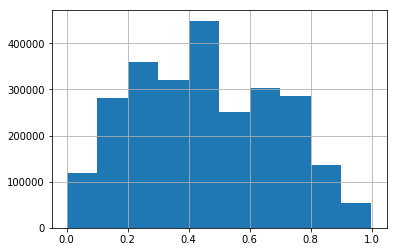

In [47]:
%matplotlib inline
sub['target'].hist()

In [48]:
sub.to_csv('submission.csv', index=False)